# Exploratory Data Analysis on House Prices Data

- Analysis based on data description in excel
- Explore Saleprice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

from scipy import stats

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.select_dtypes('object').describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Saleprice

- describe() --> sale price is greater than 0
- distplot() 
    - deviate from normal distribution 
    - peak
    - right skew (potential outliers on the right)
 
Notes: 

- If skewness is less than −1 or greater than +1, the distribution is highly skewed.

- A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

In [6]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

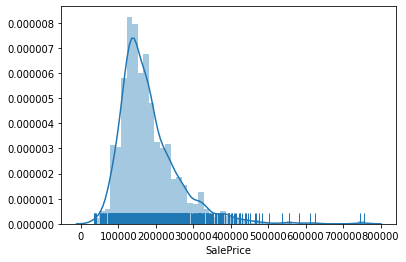

In [7]:
sns.distplot(train_data['SalePrice'], rug=True)

In [8]:
print('Skewness : {}'.format(train_data['SalePrice'].skew()))
print('Kurtosis: {}'.format(train_data['SalePrice'].kurtosis()))

Skewness : 1.8828757597682129
Kurtosis: 6.536281860064529


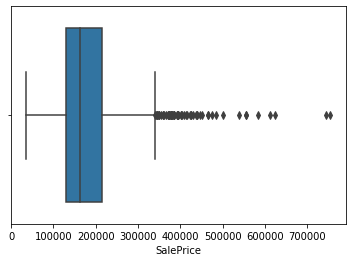

In [9]:
sns.boxplot(x=train_data['SalePrice'] )
plt.show()

In [10]:
len(train_data[train_data['SalePrice'] > 400000])

28

<font style='color: blue'> So, sales have potential outliers. Delete them for.</font>

## SalePrice vs other Numerical variables

### relplot

- visualizing relationship of Saleprice with other numerical variables

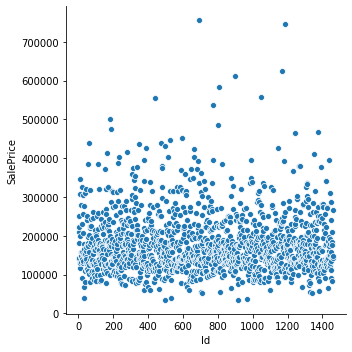

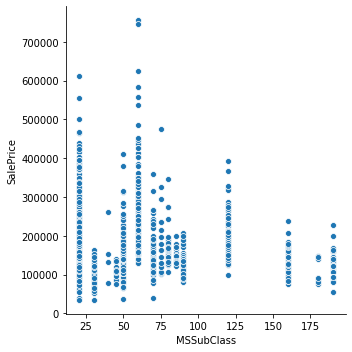

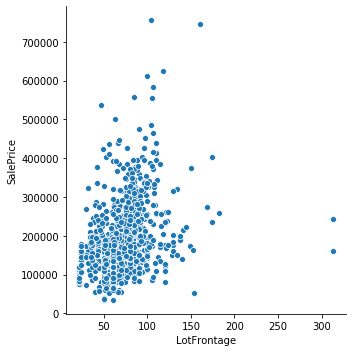

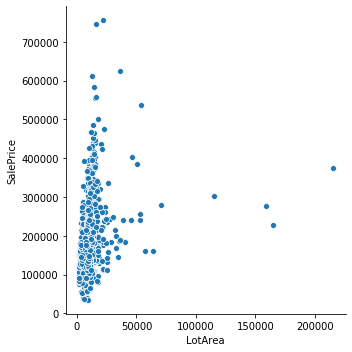

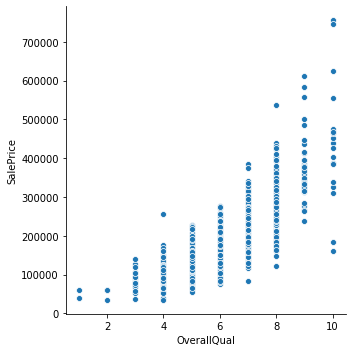

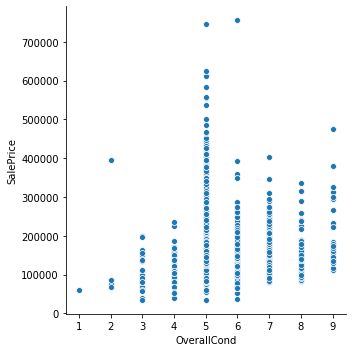

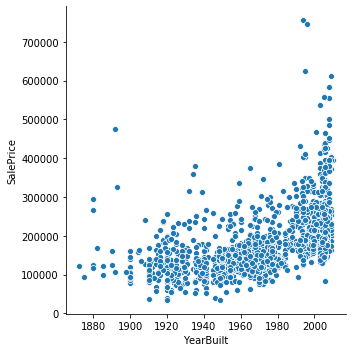

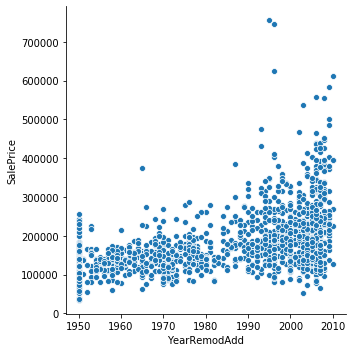

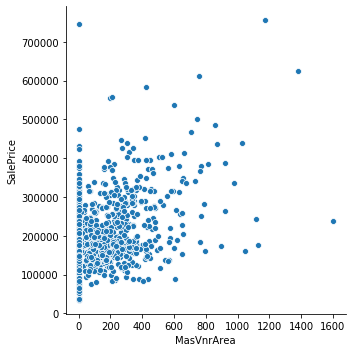

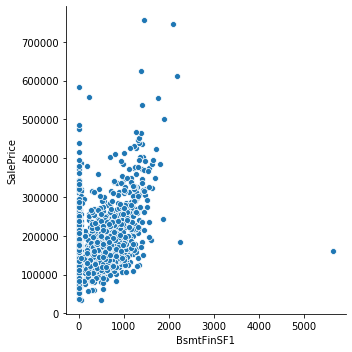

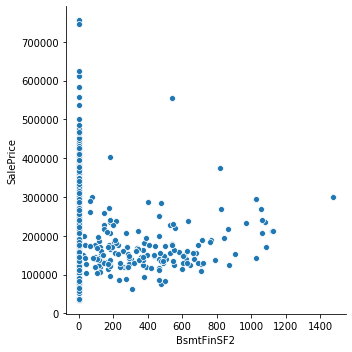

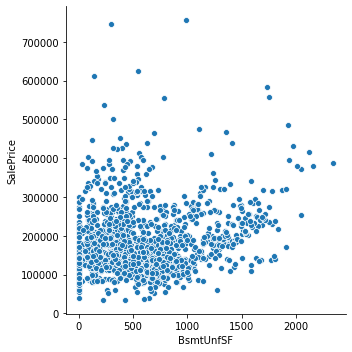

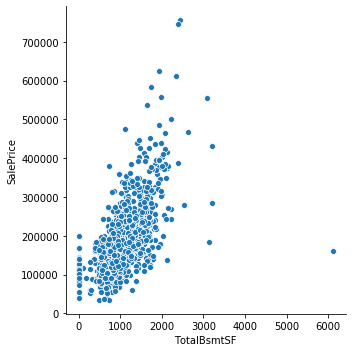

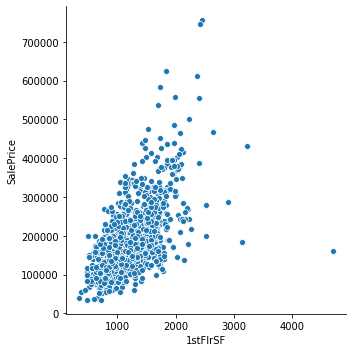

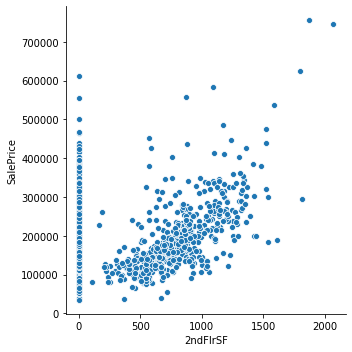

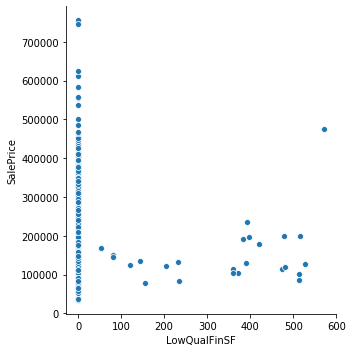

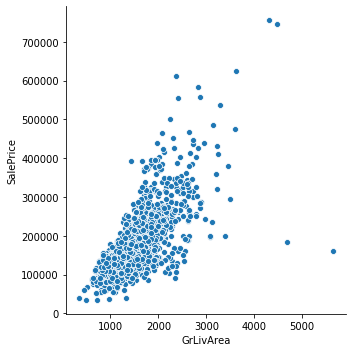

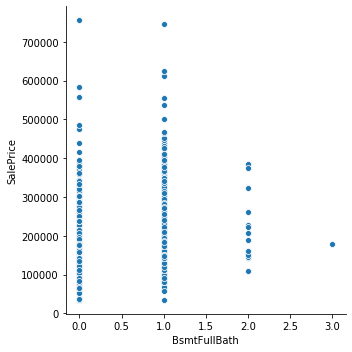

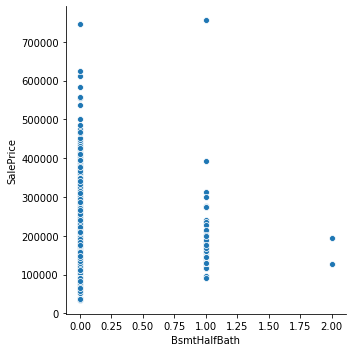

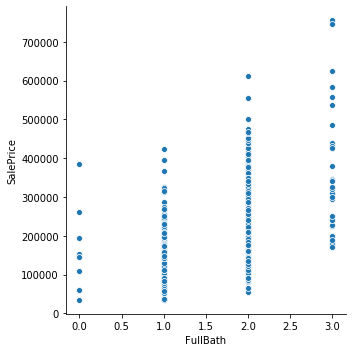

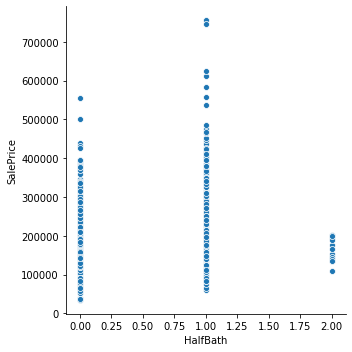

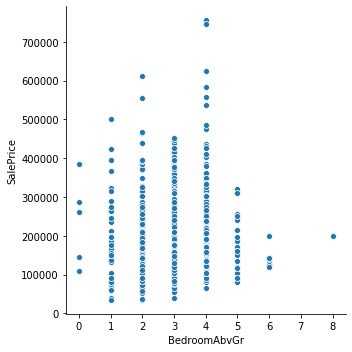

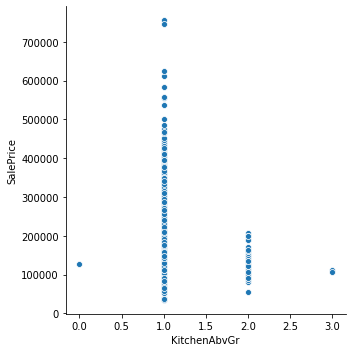

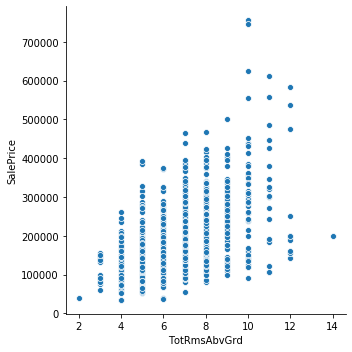

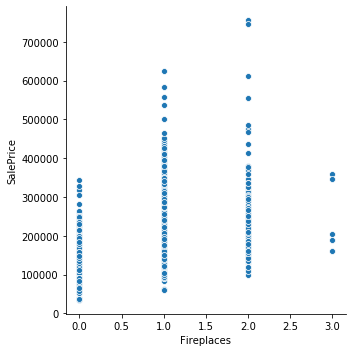

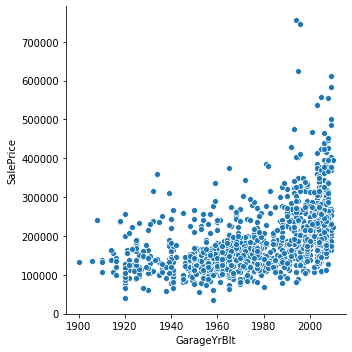

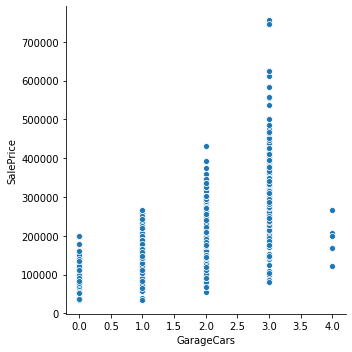

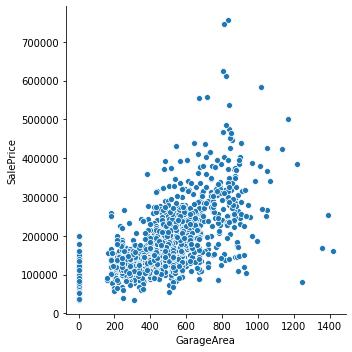

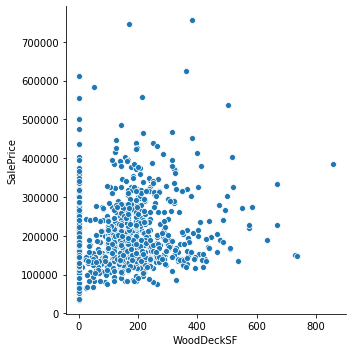

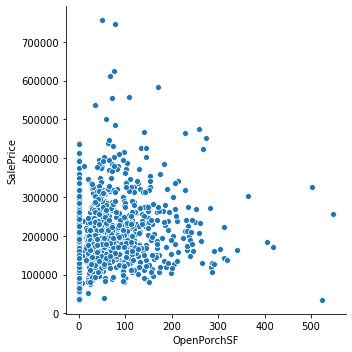

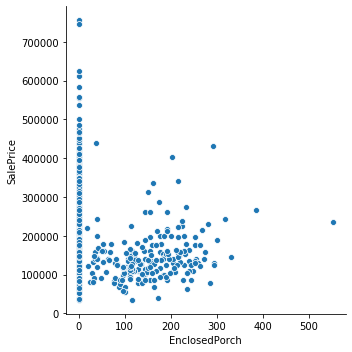

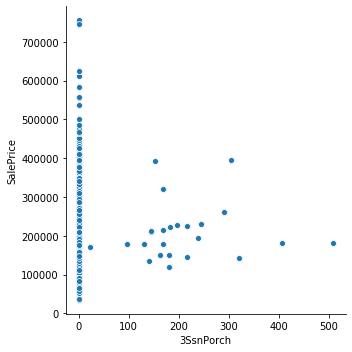

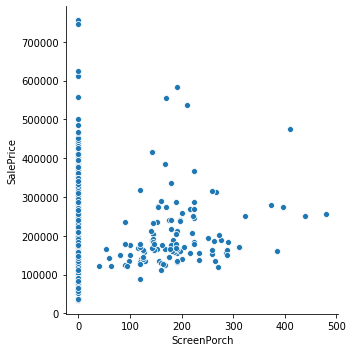

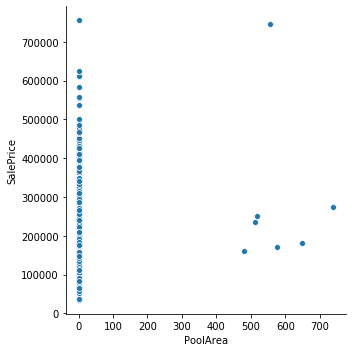

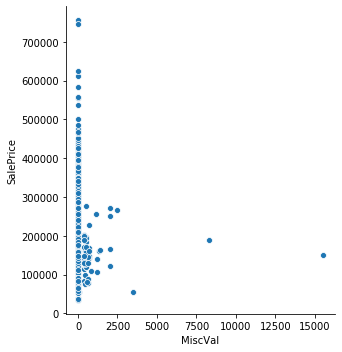

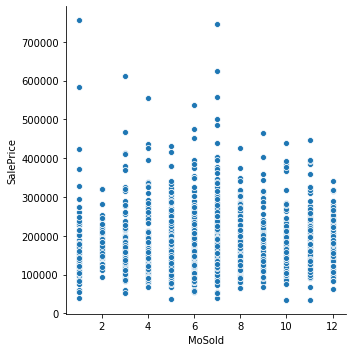

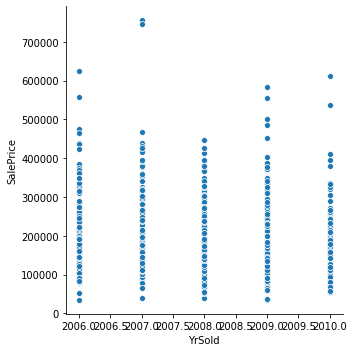

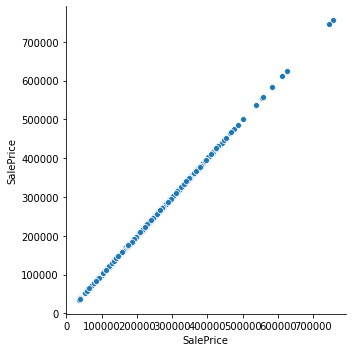

In [11]:
for col in train_data.describe().columns:
    sns.relplot(data= train_data, x=col, y ='SalePrice')
    plt.show()

## SalePrice vs other Categorical variables

### catplot

In [12]:
cat_cols = train_data.select_dtypes('object').columns

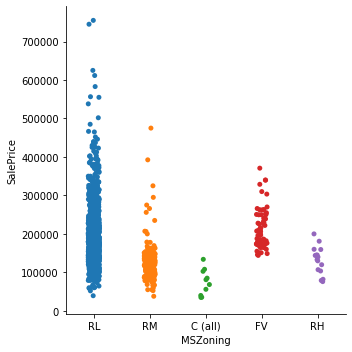

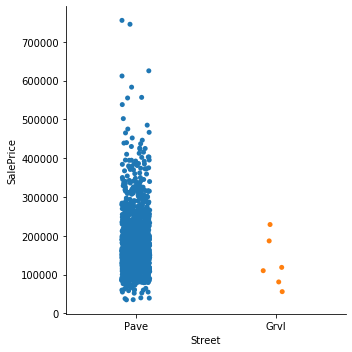

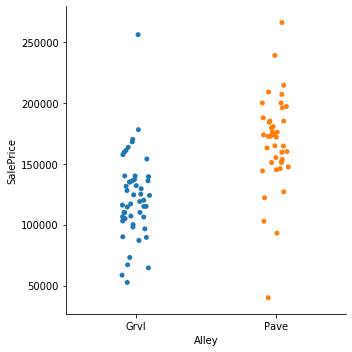

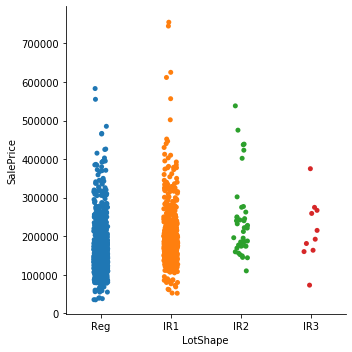

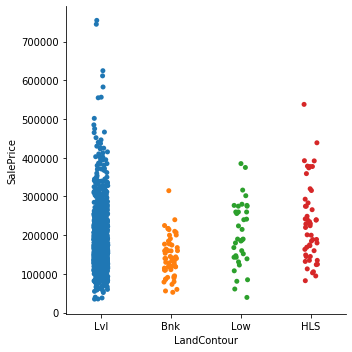

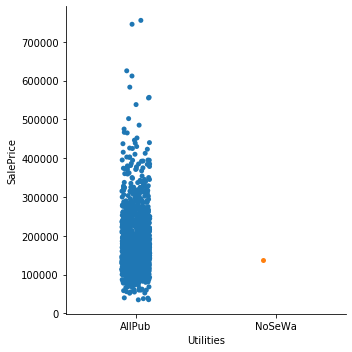

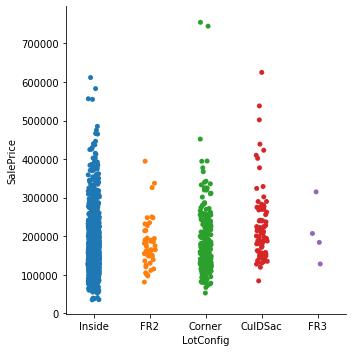

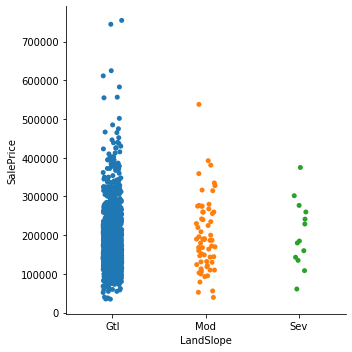

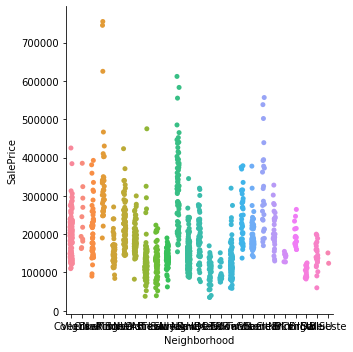

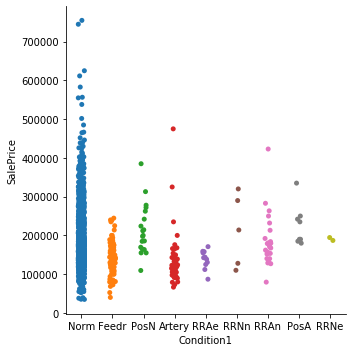

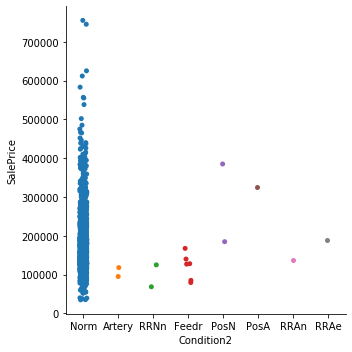

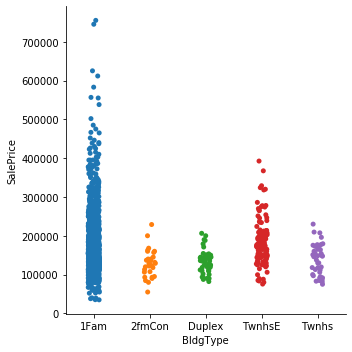

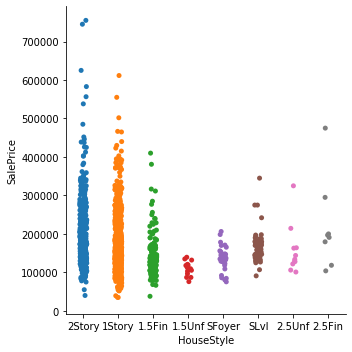

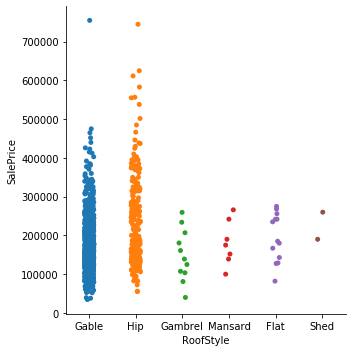

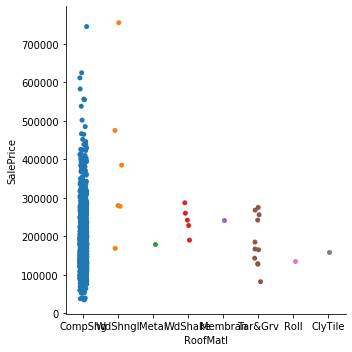

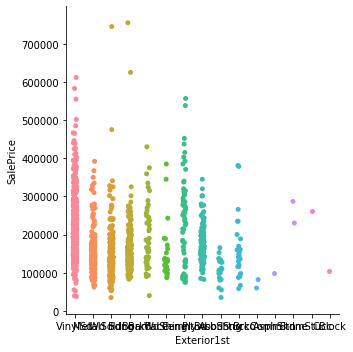

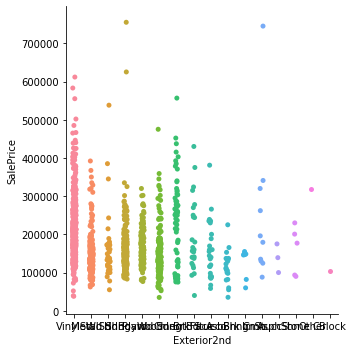

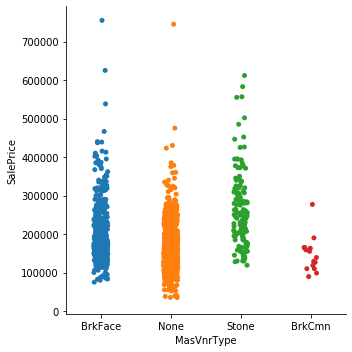

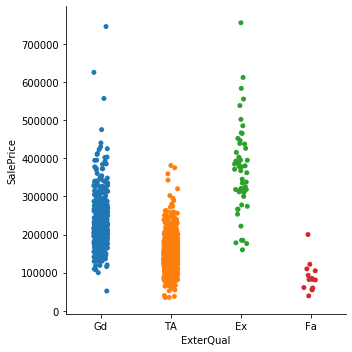

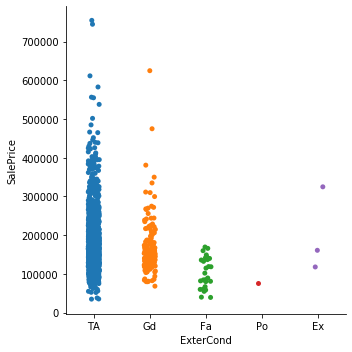

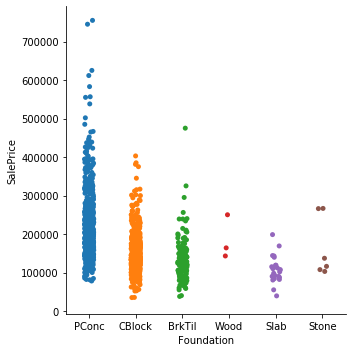

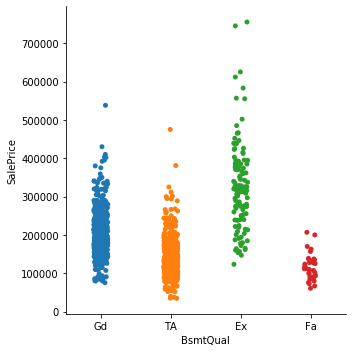

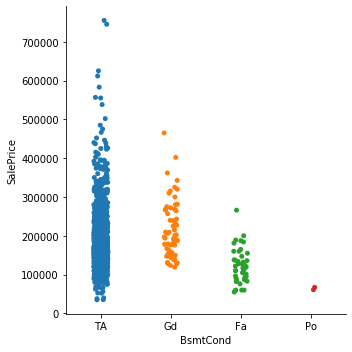

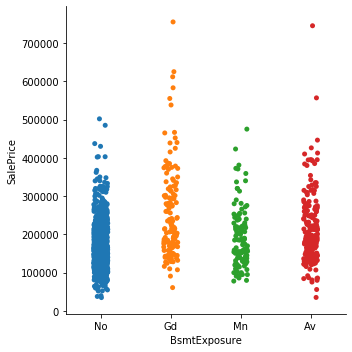

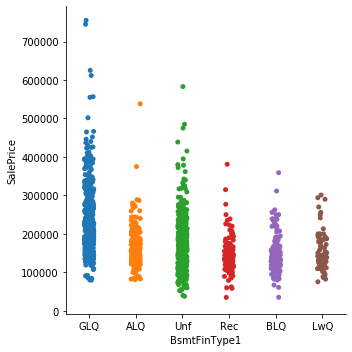

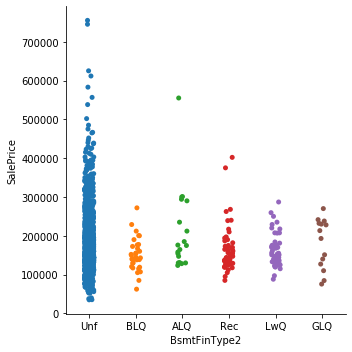

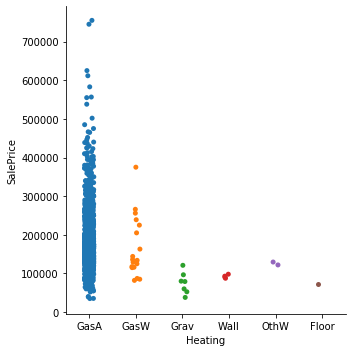

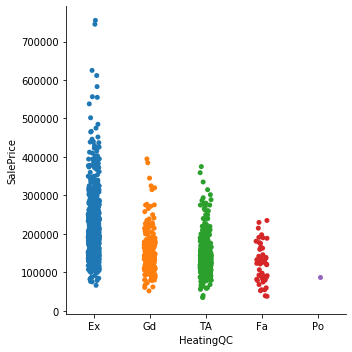

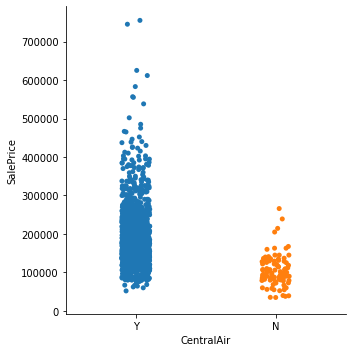

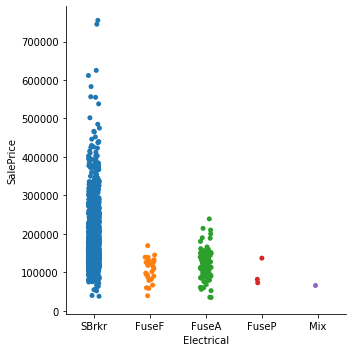

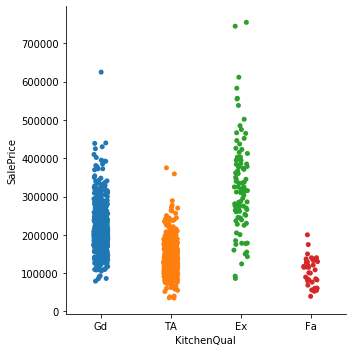

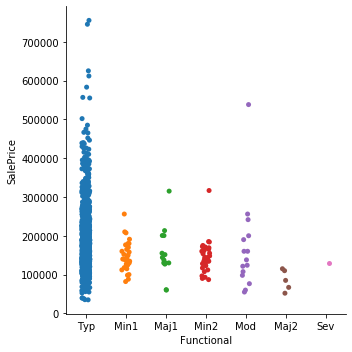

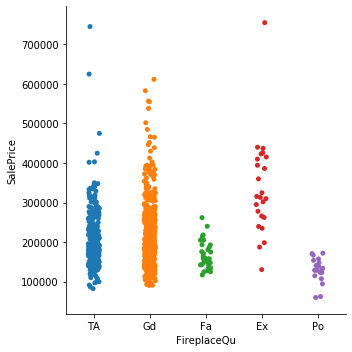

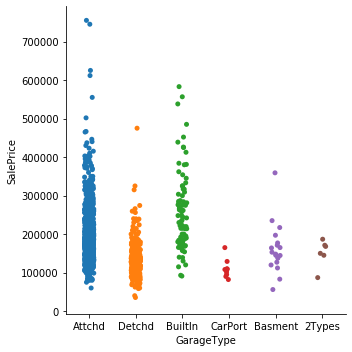

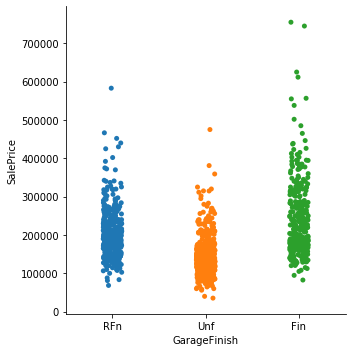

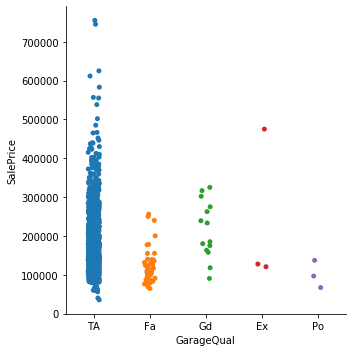

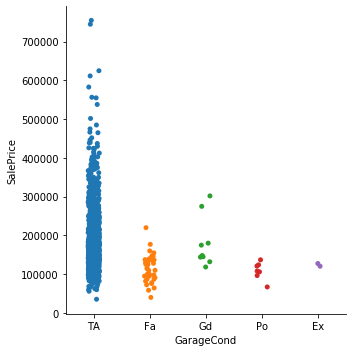

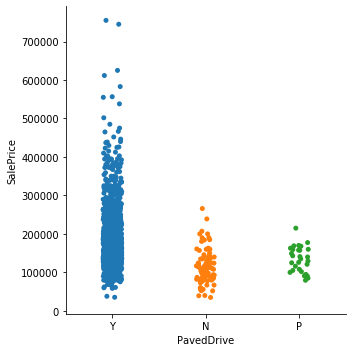

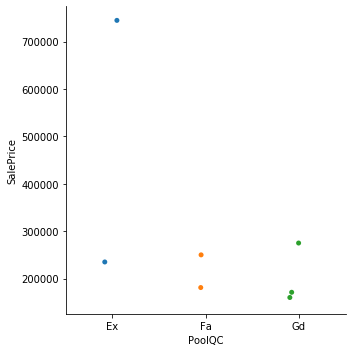

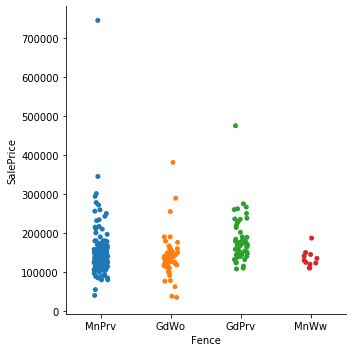

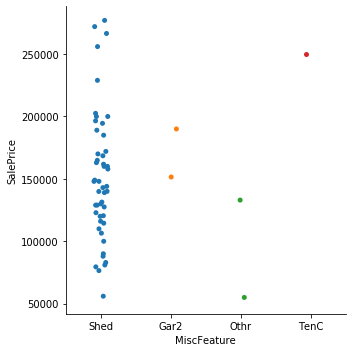

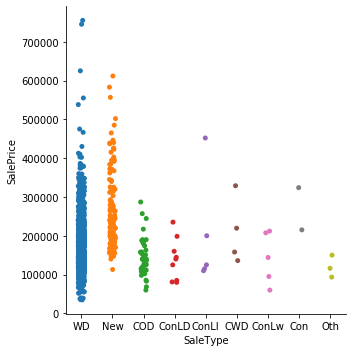

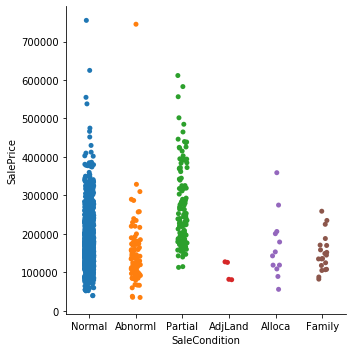

In [13]:
for col in cat_cols:
    sns.catplot(data =train_data, x=col, y ='SalePrice', hue=col)
    plt.show()

Potential Grouping :

MSZoning --> RL , FV correspond to higher prices


### boxplot

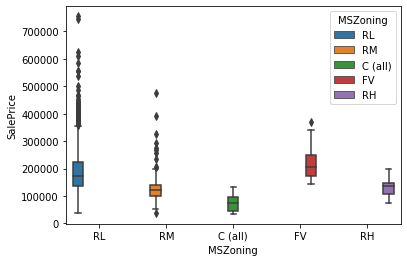

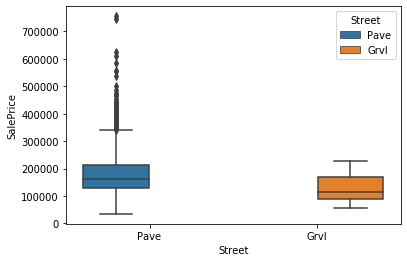

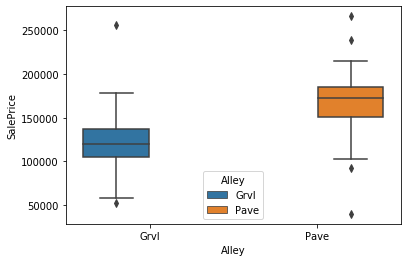

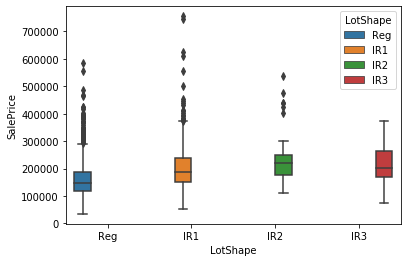

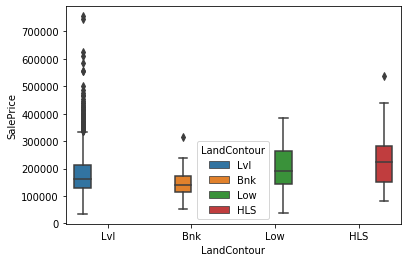

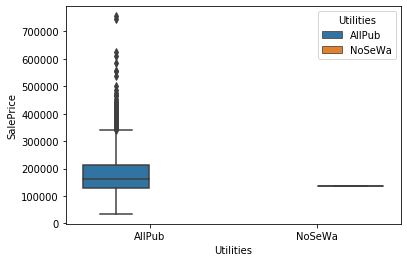

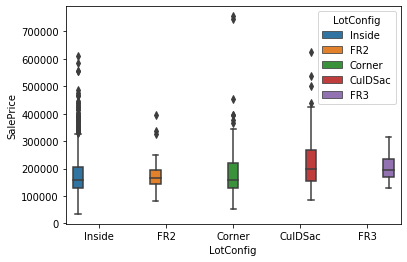

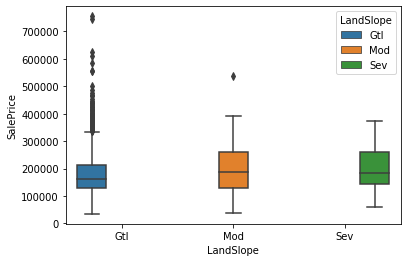

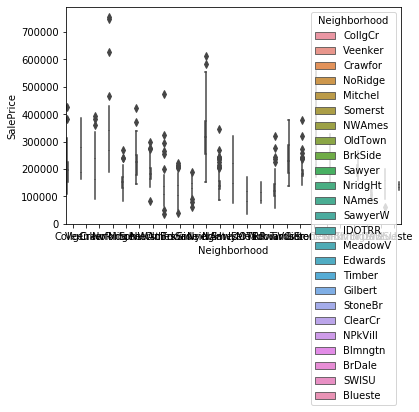

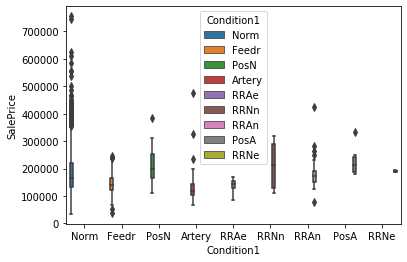

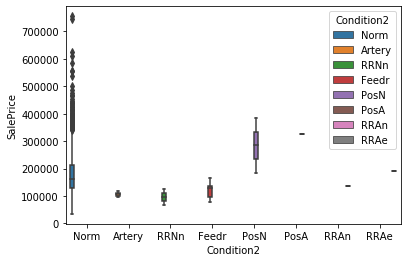

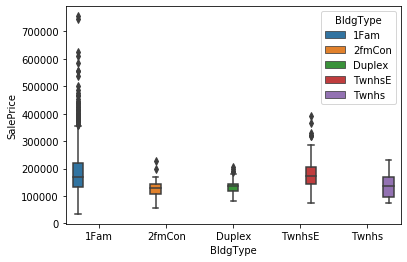

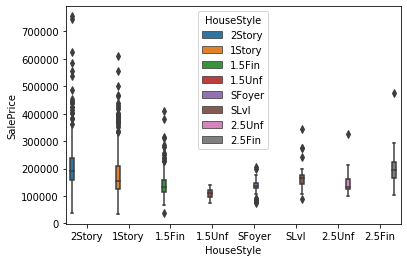

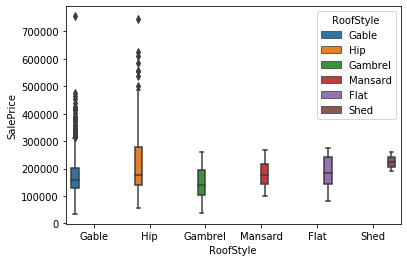

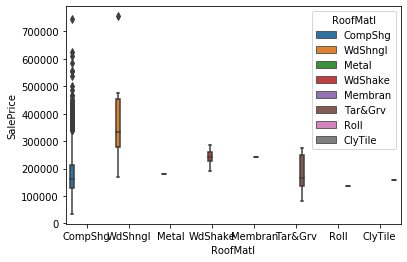

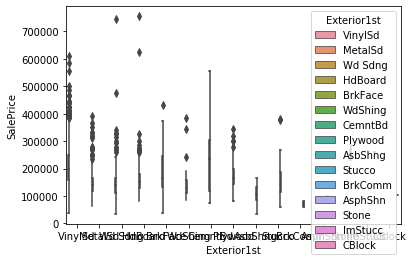

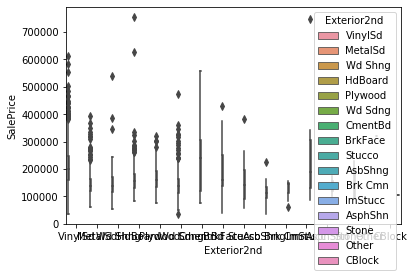

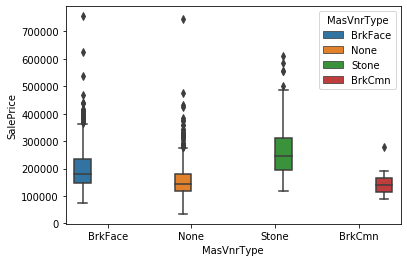

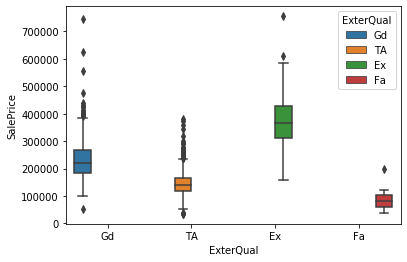

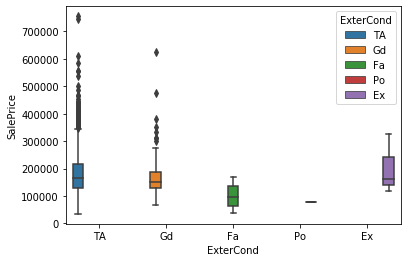

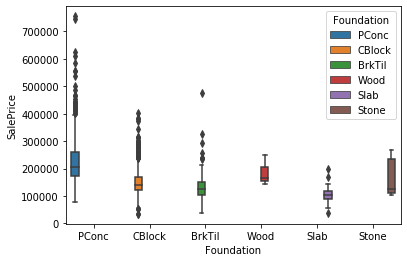

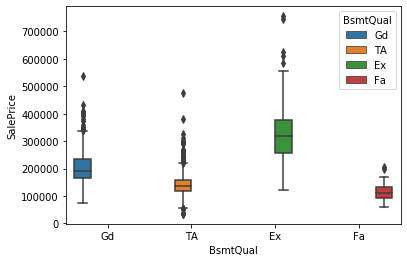

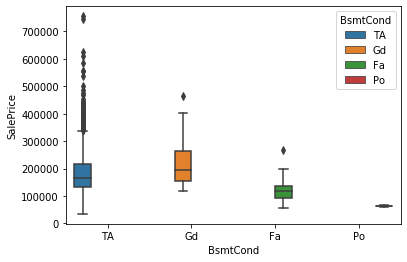

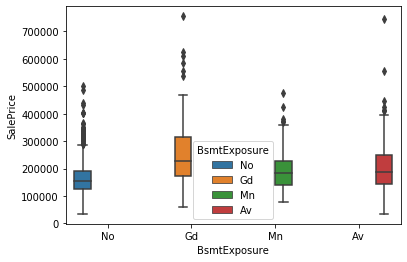

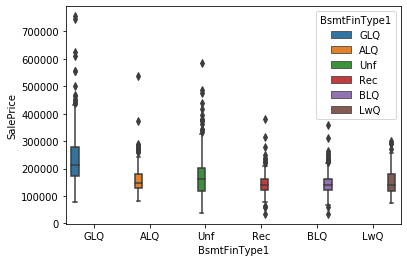

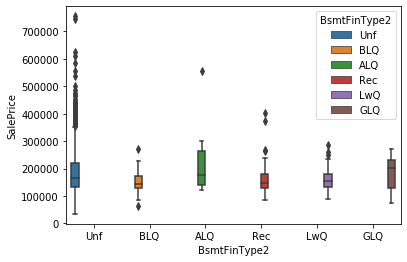

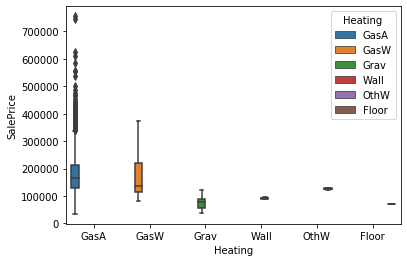

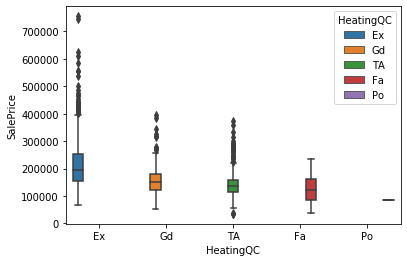

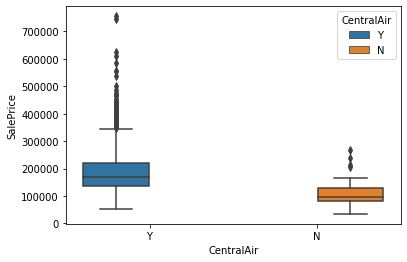

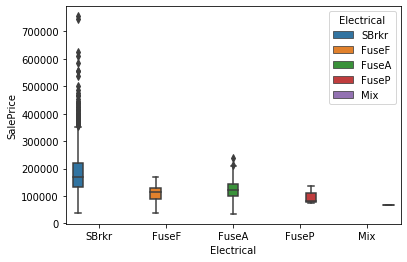

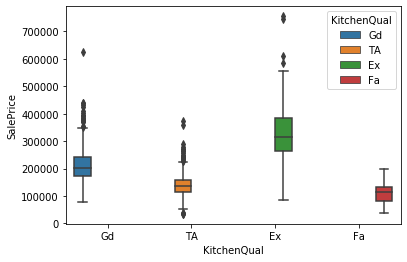

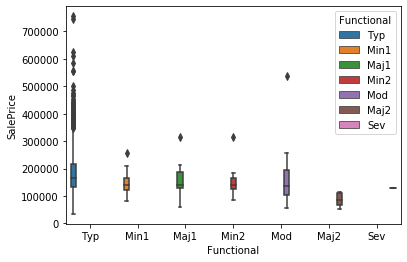

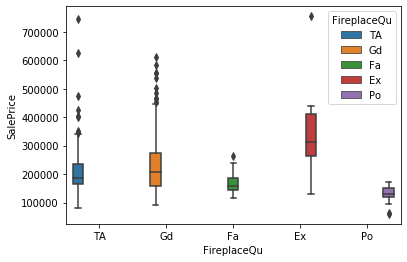

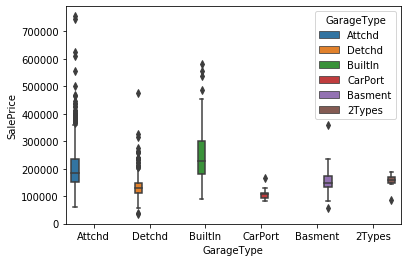

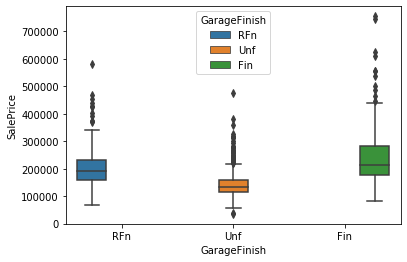

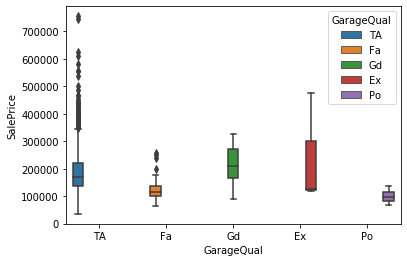

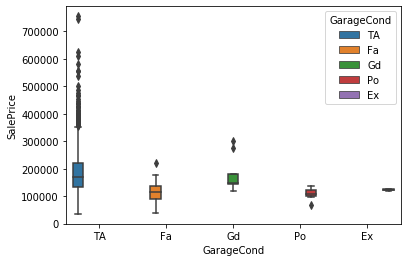

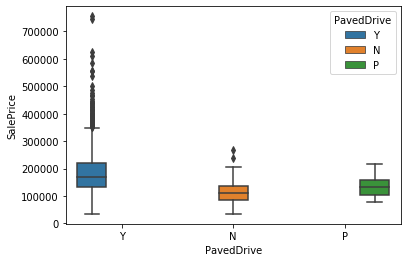

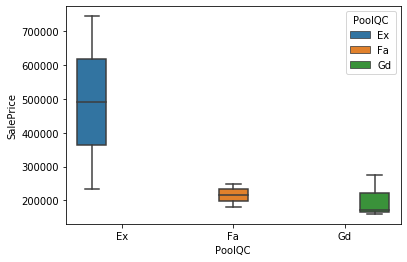

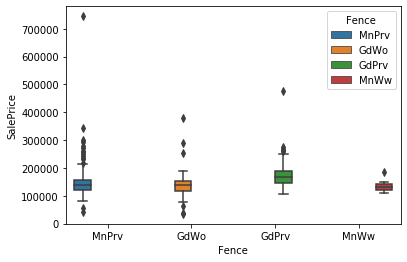

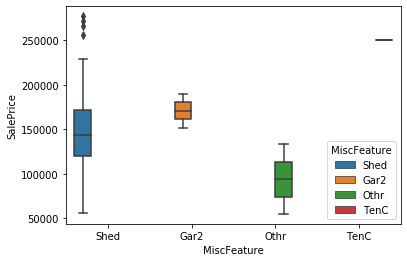

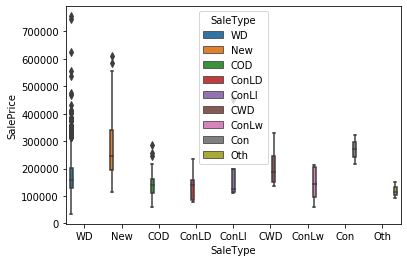

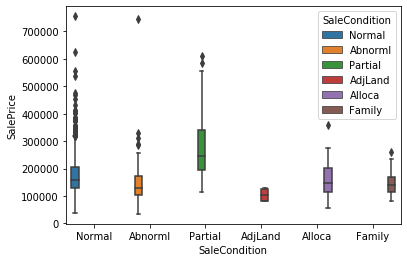

In [14]:
for col in cat_cols:
    sns.boxplot(data =train_data, x=col, y ='SalePrice', hue=col)
    plt.show()

## Correlation 

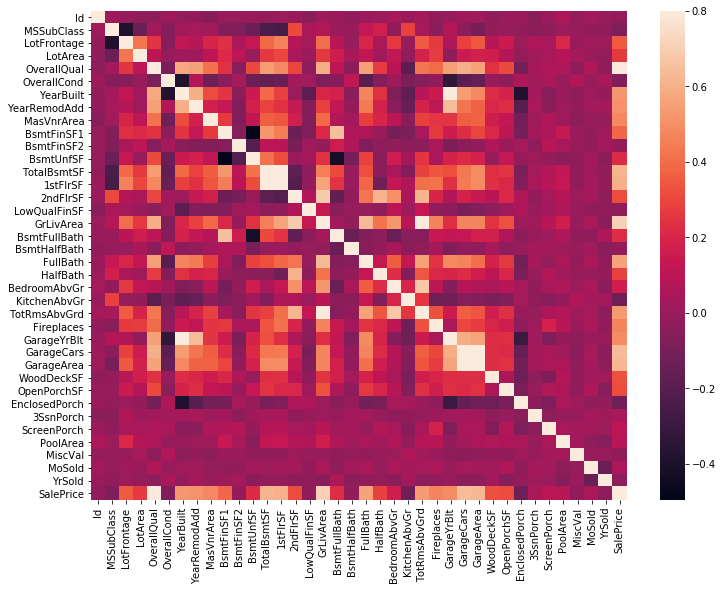

In [15]:
corr_matrix = train_data.corr()
plt.rcParams['figure.figsize'] = (12, 9)
sns.heatmap(corr_matrix, vmax=0.8)#,annot=True)


Looking at heatmap, at first glance we can see two squares : TotalBsmtSF and 1stFlrSF , Garagrecars and GarageArea that means that these are correlated and either one of them can be removed to avoid multi-collinearity.

In [16]:
#nlargest : Return the first `n` rows ordered by `columns` in descending order.
cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index

In [17]:
cm = np.corrcoef(train_data[cols].values.T)

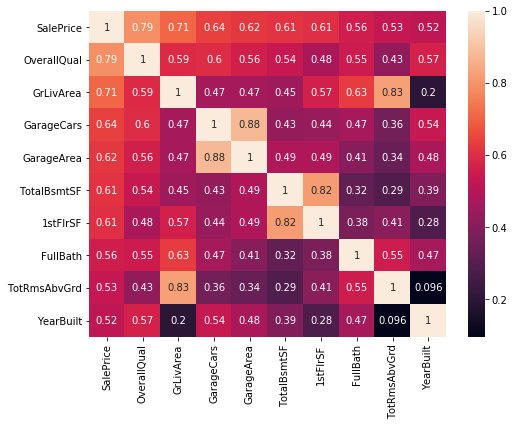

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, xticklabels=cols, yticklabels=cols, annot=True)
plt.show()

Does this validate with initial analysis in excel?


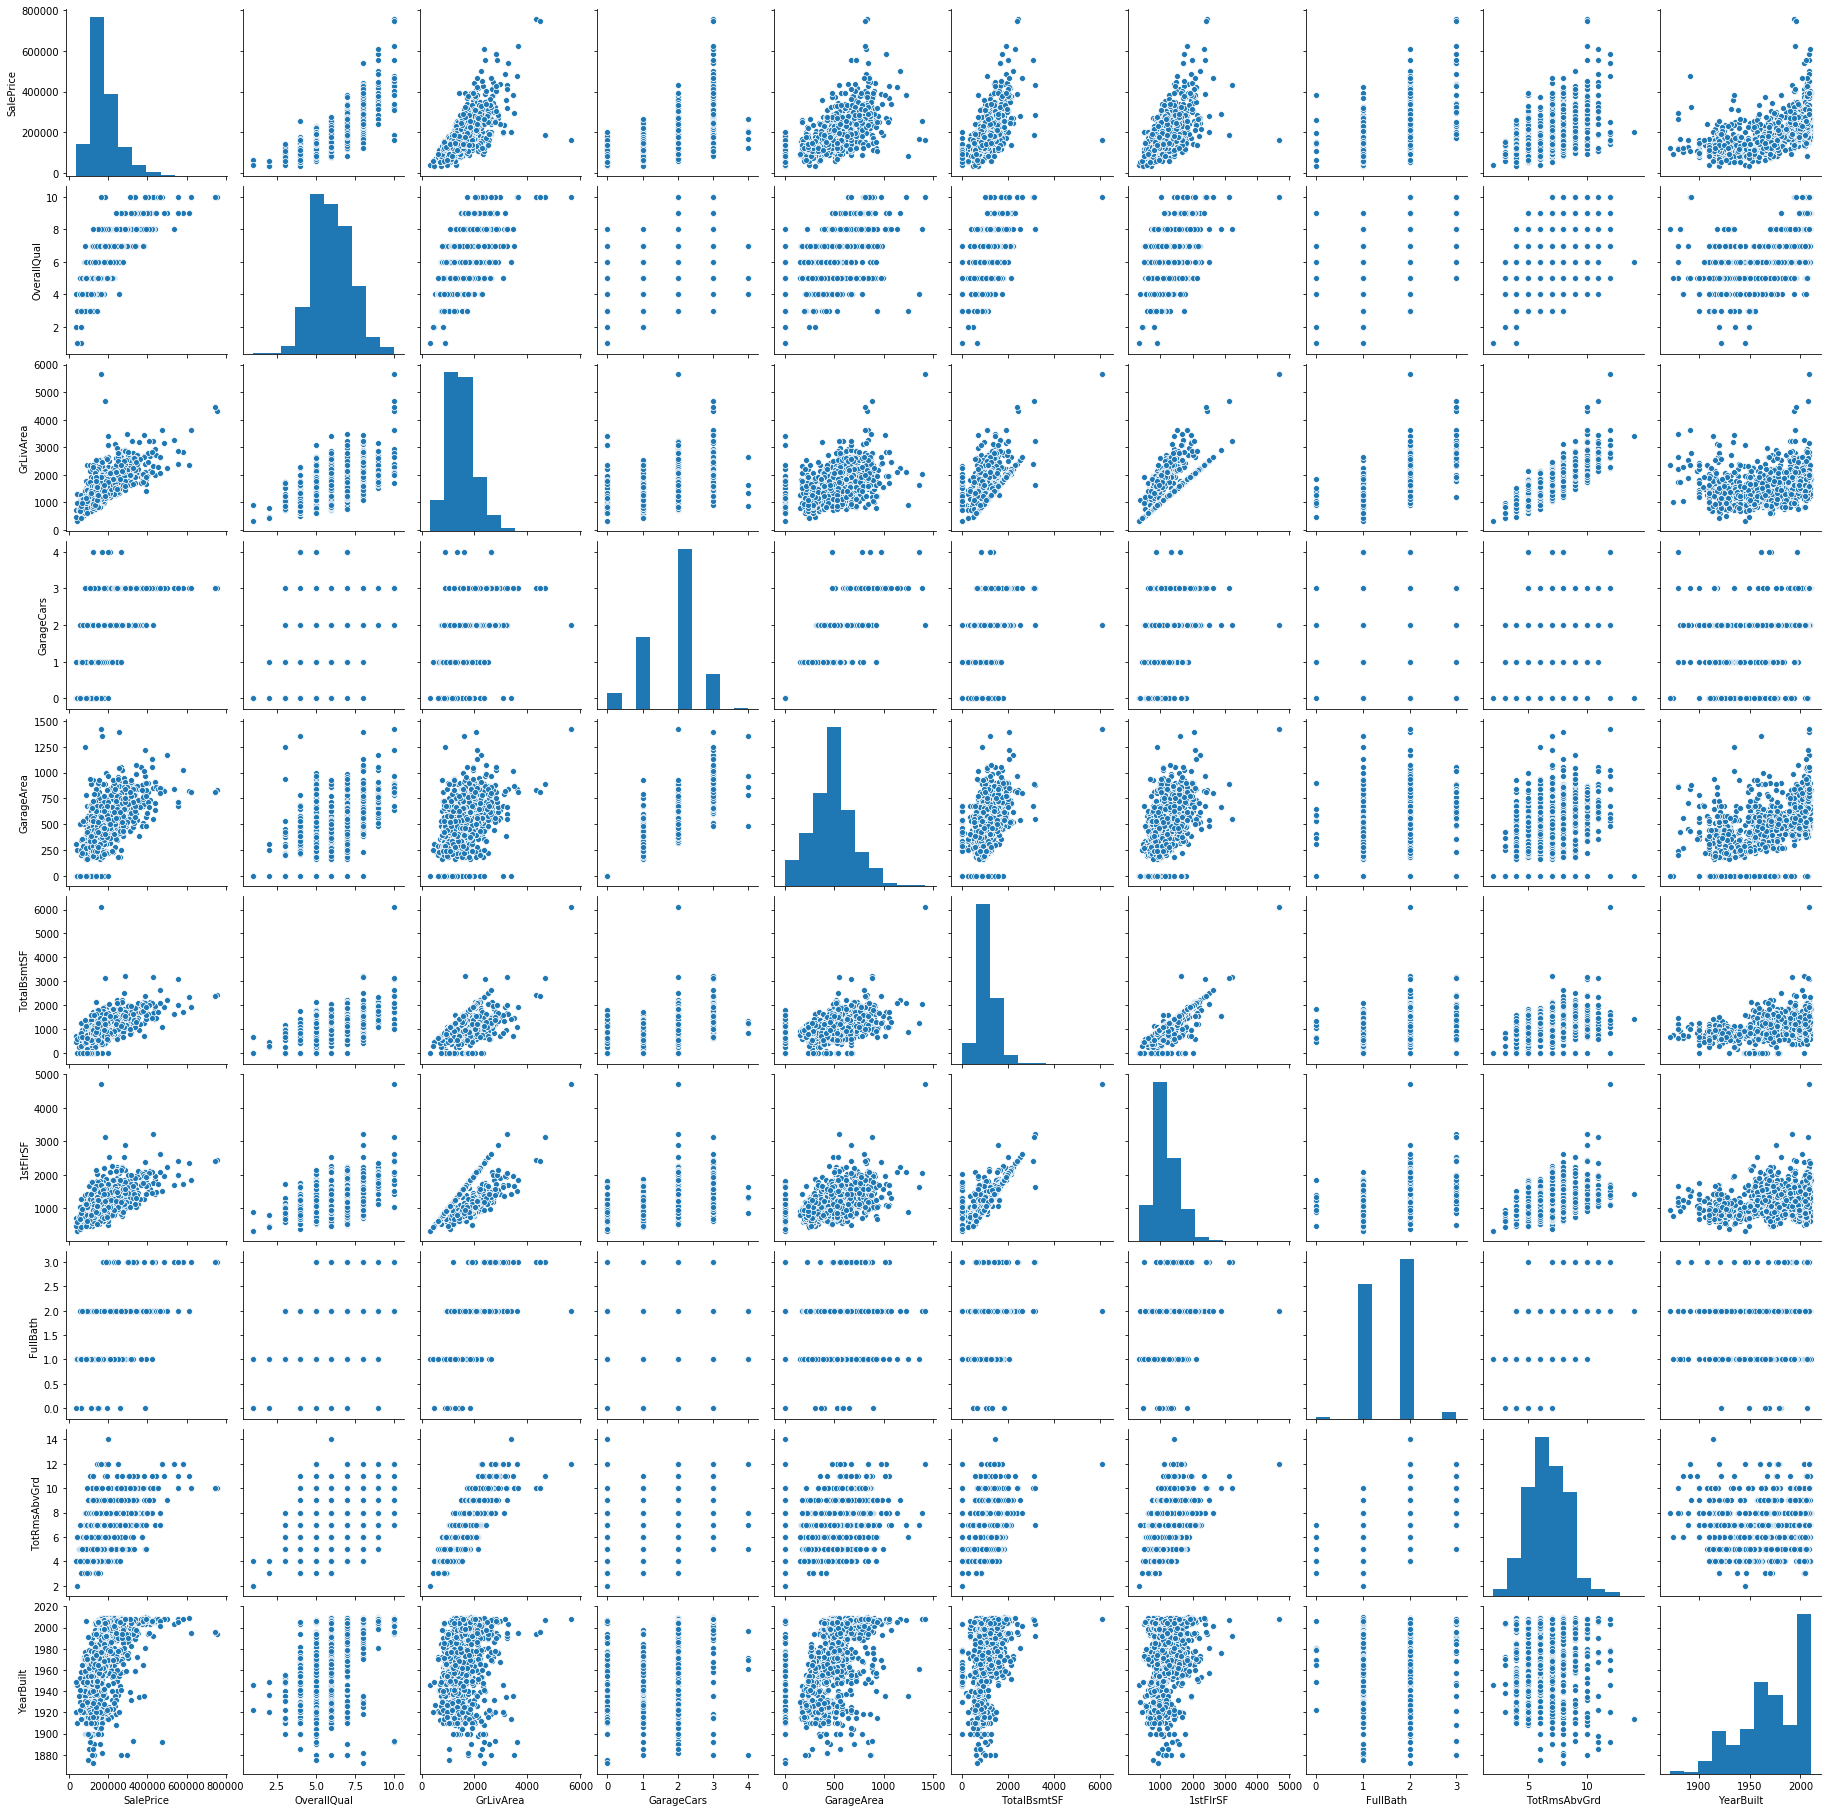

In [19]:
sns.pairplot(train_data[cols])
plt.show()

comment on each column 

##  Missing Data
- what is the percentage of missing data
- Is missing data random or does it have a pattern?
- 

1460

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

In [44]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = ((train_data.isnull().sum()/len(train_data))*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis =1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


If more than 15% of the data is missing , let's delete it
Decide about others based on above analysis



### Analysis of columns with missing values

**Leave 'NAN' in categorical data as it is; it is handled as a category with -1 value** 


LotFrontage - median because it has outliers as per box plot above 

MasVnrArea - mode 

BsmtFinSF1 - median because it has outliers as per box plot above 

BsmtFinSF2 - Drop Column 

BsmtUnfSF - median

TotalBsmtSf  - median

Year columns  - bin them 

GarageArea - median 

Above choice of median/mode is based on the dist and box plots above

## Outliers

### Univariate Analysis
For sale price delete the values that have more than 400k as seen above in the graph 

### Bivariate Analysis

In above plots (sale price vs numerical) observe which columns can be deleted


## Checking Assumptions

Do it after selecting features 





### Linearity 

### Absence of Correlated errors

### Normality 

Check : 
- histogram and 
- normal probability plot; 
    - if no straight line, apply log transformation
    - if value zero, then can't apply log transformations
    

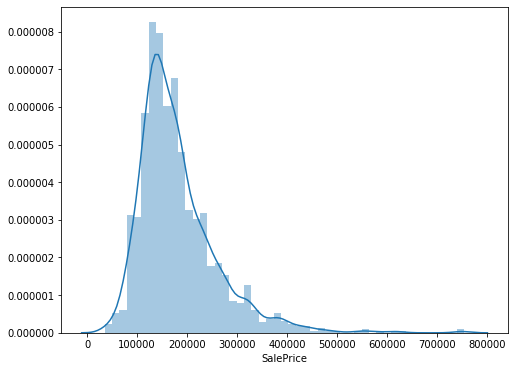

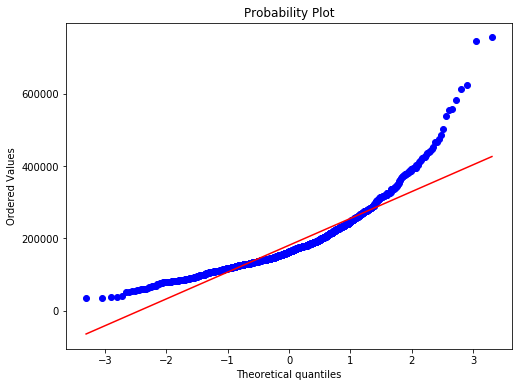

In [52]:
sns.distplot(train_data['SalePrice'])
fig = plt.figure()
res= stats.probplot(train_data['SalePrice'], plot=plt)

### Homoscedasticity 

- Between Sale Price and other numeric variable we must get a trending pattern (expecially after log transformations)

## Data Dictionary

Following columns are ordered:

    - OverallQual 
    - OverallCond 
    - orderded
    - ExterQual 
    - ExterCond 
    - Ordered
    - BsmtQual 
    - BsmtCond
    - HeatingQC
    - KitchenQual
    - FireplaceQu
    - GarageQual
    - GarageCond
    - PoolQC
    - BsmtFullBath -- Odered (more is better)
    - BsmtHalfBath -- (no-negative trend )
    - FullBath -- ordered (upward trend)
    - HalfBath -- ordered (upward trend)
    - BedroomAbvGr -- ordered (upward trend)
    - KitchenAbvGr -- ordered (down trend)
    - TotRmsAbvGrd -- ordered (upward trend)
    - Fireplaces -- ordered (upward trend)
    - GarageCars -- ordered (upward trend)

Following columns can be considered to be ordered:
    - BsmtExposure 
    - BsmtFinType1 
    - BsmtFinType2
    
Following can be binned:
    - MSSubClass
    - YearBuilt
    - YearRemodAdd
    - GarageYrBlt
    - YrSold  

In [20]:
data_dict = {
    'MSSubClass': [20,30,40,45,50, 60,70,75,80,85,90,120,150,160,180,190], 
    'MSZoning': ['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 
    'Street': ['Grvl', 'Pave'], 
    'Alley': ['Grvl', 'Pave'], 
    'LotShape': ['Reg','IR1', 'IR2', 'IR3'], 
    'LandContour': ['Lvl','Bnk', 'HLS','Low'], 
    'Utilities': ['AllPub','NoSewr','NoSeWa','ELO'],
    'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 
    'LandSlope': ['Gtl', 'Mod', 'Sev'], 
    'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert'
                    ,'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 
                    'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 
    'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'BldgType': ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], 
    'HouseStyle': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'], 
    'OverallQual': np.arange(1,11), 
    'OverallCond': np.arange(1,11), 
    'RoofStyle': ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], 
    'RoofMatl': ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], 
    'Exterior1st': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'Exterior2nd': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
    'MasVnrType': ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'], 
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], 
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'], 
    'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'Heating': ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], 
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'CentralAir': ['N', 'Y'],
    'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], 
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'GarageType': ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'],
    'GarageFinish': ['Fin', 'RFn', 'Unf'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'GarageCond': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'PavedDrive': ['N', 'P', 'Y'], 
    'PoolQC':  ['Fa', 'TA', 'Gd','Ex'], 
    'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw'], 
    'MiscFeature': ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC'],
    'SaleType': ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD','Oth'], 
    'SaleCondition': ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'], 
    'BsmtFullBath': np.arange(0,4), 
    'BsmtHalfBath': np.arange(0, 3),
    'FullBath': np.arange(0,5),
    'HalfBath': np.arange(0,3), 
    'BedroomAbvGr': np.arange(0,9),
    'KitchenAbvGr' : np.arange(0,4), 
    'TotRmsAbvGrd' : np.arange(0, 16), 
    'Fireplaces' : np.arange(0,5), 
    'GarageCars' : np.arange(0,6), 
    'MoSold' : np.arange(1,13)
   
}

len(data_dict.keys())

56

## Change columns to appropriate types in combined data

In [21]:
#

In [22]:
order_cat = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
             'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

# year is categorical variable becuase it makes no sense to add two years. 
# Also house build in 2010 is better than the one built in 1980

year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'] 

In [23]:
cat_cols = data.select_dtypes('object').columns.values
cat_cols

NameError: name 'data' is not defined

In [ ]:
# columns that are categorical but not object type
additional_cat = [key for key in data_dict.keys() if key not in cat_cols]
cat_cols = np.concatenate((cat_cols, additional_cat))
cat_cols

In [ ]:
for col in cat_cols:
    is_ordered = True if col in order_cat else False
    data[col] = pd.Categorical(data[col], categories=data_dict[col], ordered=is_ordered)

In [ ]:
# add categories for categrical data
for col in year_cols:
    data[col] = pd.Categorical(data[col], ordered=True)

In [ ]:
data.select_dtypes('category').describe()

In [ ]:
data['YrSold'].min(), data['OverallQual'].max(), data['ExterQual'].min(), data['ExterQual'].max()

### Columns that has missing categories

In [ ]:
temp = pd.DataFrame(data.select_dtypes('category').describe())
temp

In [ ]:
print('col_name' , 'expected # of categories', ' --> ', 'actual # of categories', '-->', 'missing categories')
for i, key in enumerate(cat_cols):
    unique_val = temp.loc[['unique'], [key]].values[0][0]
    print(key , len(data_dict[key]), ' --> ', unique_val, '-->', (len(data_dict[key]) - unique_val))

In [ ]:
data['MiscFeature'].value_counts()

In [ ]:
data_dict['MiscFeature']

In [ ]:
len(data.columns)

In [ ]:
data.corr()

# Correlations

In [ ]:
temp_data = data[data.describe().columns]

In [ ]:
for col in data.select_dtypes('category').columns:
    temp_data[col] = data.loc[:, col].cat.codes
temp_data.shape    

In [ ]:
plt.rcParams['figure.figsize'] = (45.0, 25.0)

mask = np.triu(temp_data.corr())

sns.heatmap(temp_data.corr(), mask=mask, cmap= 'coolwarm')#,annot=True)


#sns.heatmap(temp_data.corr())


In [ ]:
data['FireplaceQu'].cat.codes

## Split 'combined data' between test and train for separtae analysis

In [ ]:
test_data = data[data['SalePrice'] == -999]

In [ ]:
train_data = data[data['SalePrice'] != -999]

## Exploratory Analysis on each column

### Sale price


# Next steps after analysis

In combined data :
- Bin all the year columns 
- Drop columns that show no relationship
In train data:
- Fill missing values of numerical varaibles as per the above analysis [mean|median|mode of combined data]

## Binning 

Let's see the range of year build columns 

In [ ]:
for col in year_cols:
    print(col , ' --> ', data[col].min(), data[col].max(), data[col].max() - data[col].min())

Let's so equal width binning for all year columns based on combined data

### YearBuilt

In [ ]:
yr_built_bins = [1872, 1950, 1960, 1980, 1990, 2000, 2010]

In [ ]:
data['bin_yr_built'] = pd.cut(data['YearBuilt'], bins= yr_built_bins, precision=0)

In [ ]:
data['bin_yr_built'].value_counts()

### YearRemodAdd

In [ ]:
yr_remod_bins = [1950, 1980, 1990, 2000, 2010]

In [ ]:
data['bin_yr_remod'] = pd.cut(data['YearRemodAdd'], bins= yr_remod_bins, precision=0)
data['bin_yr_remod'].value_counts()

### GarageYrBlt

In [ ]:
yr_garage_bins = [1895, 1950, 1980, 1990, 2000,2207]

In [ ]:
data['bin_garage_built'] = pd.cut(data['GarageYrBlt'], bins= yr_garage_bins, precision=0)
data['bin_garage_built'].value_counts()

## YrSold

In [ ]:
yr_sold_bins = [2006, 2007, 2008, 2009, 2010]
data['bin_yr_sold'] = pd.cut(data['YrSold'], bins= yr_sold_bins, precision=0)
data['bin_yr_sold'].value_counts()

### MoSold

In [ ]:
# seperating it in four seasons
month_sold_bins = [1, 4, 6, 9, 12]
#month_sold_bins_lbl = ['spring', 'summer', 'fall', 'winter']
data['bin_mo_sold'] = pd.cut(data['MoSold'], bins= month_sold_bins, precision=0)
data['bin_mo_sold'].value_counts()


### MSSubClass

come back later 

In [ ]:
#'MSSubClass': [20,30,40,45,50, 60,70,75,80,85,90,120,150,160,180,190], 


## Drop Columns

Drop columns that are not contributinmeaningfully and also binned columns

In [ ]:
to_be_dropped_cols = ['BsmtFinSF2' , 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 
                      'ScreenPorch', 'MiscVal', 'PoolArea', 
                      'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [ ]:
data.drop(to_be_dropped_cols, axis=1, inplace =True)
data.shape

## Filling missing values

Fill in missing values for following columns only
- LotFrontage --> median 
- MasVnrArea  --> median

Let's first split the data into test and train

In [ ]:
test_data = data[data['SalePrice'] == -999]
test_data.shape

In [ ]:
test_data.drop('SalePrice', axis =1, inplace =True)
test_data.shape

In [ ]:
train_data = data[data['SalePrice'] != -999]
train_data.shape

In [ ]:
#now check any cols with missing data in training data
[col for col in train_data.describe().columns if train_data[col].isnull().sum() > 0]

In [ ]:
train_data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

In [ ]:
train_data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [ ]:
#now check any cols with missing data
[col for col in train_data.describe().columns if train_data[col].isnull().sum() > 0]

# Save for later use

In [ ]:
#save data to file
#pd.to_pickle(train_data, 'data/train_data_cat_missing_binning_handled.pkl')
#pd.to_pickle(test_data, 'data/test_data_cat_missing_binning_handled.pkl')